In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
import networkx as nx

In [2]:
df = pd.read_csv("AllCellTraces.csv")

In [3]:
columns_to_show = ['AVA?', 'AVAL', 'AIB?', 'AIBL', 'AIB?-alt']
df_filtered = df[columns_to_show]

In [4]:
df_filtered

,AVA?,AVAL,AIB?,AIBL,AIB?-alt
0,4.214640,0.528195,2.692174,0.431313,2.878647
1,2.732479,1.582255,2.091456,0.104095,2.125158
2,1.888660,1.312934,2.150354,0.381532,1.645879
3,1.443402,0.679683,1.947934,0.666666,1.512016
4,1.166758,1.737709,1.364337,0.959825,1.170101
...,...,...,...,...,...
1595,-0.833517,-2.794221,0.265134,-0.661245,-0.284621
1596,-0.955873,-1.710486,-0.128505,-0.763889,-0.170242
1597,-1.200517,-1.208175,-0.561460,-0.866904,0.056889
1598,-1.166378,-1.199265,-0.597799,-0.711770,0.056914


Displat line chart for neurons of interest

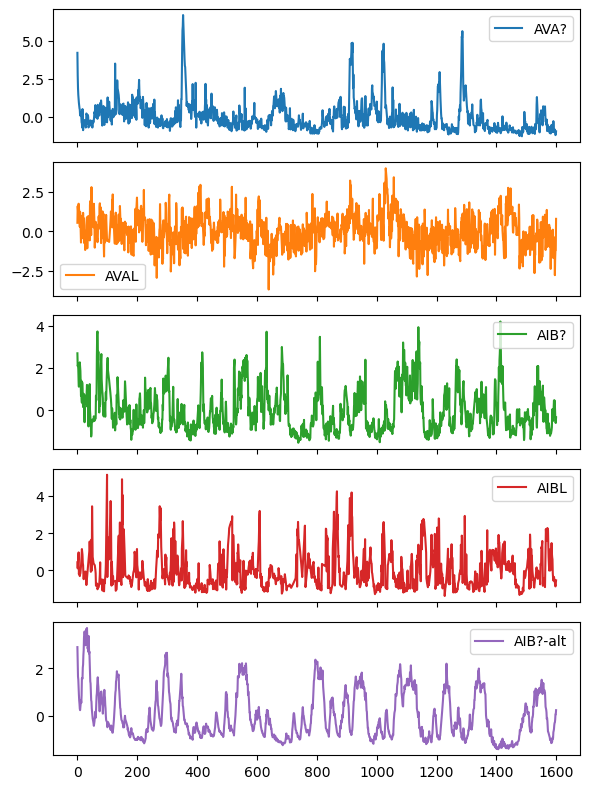

In [5]:
df_filtered.plot(kind = 'line', subplots = True, layout = (len(df_filtered.columns), 1), figsize = (6, 8))

plt.tight_layout()
plt.show()

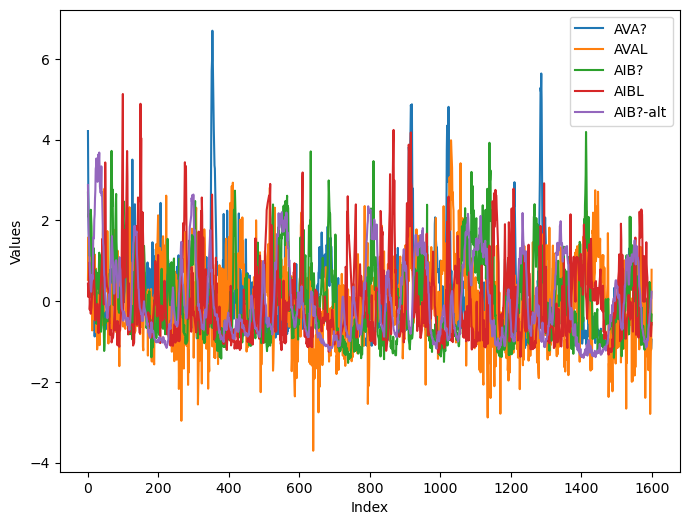

In [6]:
df_filtered.plot(kind = 'line', figsize=(8, 6))

plt.xlabel('Index')
plt.ylabel('Values')

plt.show()

Using lagged correlations technique

In [7]:
max_lag = 100

result_matrix = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), index = df.columns, columns = df.columns)

for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        col_a = df.iloc[:, i]
        col_b = df.iloc[:, j]
        
        correlations = []  
        
        for lag in range(-max_lag, max_lag + 1):
            if lag < 0:
                corr, _ = spearmanr(col_a[:lag], col_b[-lag:])
            elif lag > 0:
                corr, _ = spearmanr(col_a[lag:], col_b[:-lag])
            else:
                corr, _ = spearmanr(col_a, col_b)
                
            correlations.append(corr)
        
        max_corr = max(correlations, key = abs)
        
        result_matrix.iloc[i, j] = max_corr
        result_matrix.iloc[j, i] = max_corr
        
result_matrix

,AWCL,BAGR,AUAL,BAGL,AIB?,RMEL,MI,RMED,RID,URAVL,...,NSMR,AWAL-alt.1,URADR,OLQDR,IL1R,SMDDR,OLQDL.2,UNKNOWN.6,UNKNOWN.7,IL1L
AWCL,1.000000,0.327464,-0.374114,0.279395,0.179088,0.436788,-0.322826,0.490791,-0.215976,0.417373,...,0.210247,0.261183,0.246892,0.291291,0.313062,-0.258404,0.287307,0.388067,-0.569621,0.525682
BAGR,0.327464,1.000000,0.166592,0.235354,0.157468,0.323369,-0.161447,-0.230144,0.140423,0.183005,...,0.190037,-0.129597,0.237714,0.102620,0.217205,0.110511,0.383905,0.258161,-0.356608,0.128809
AUAL,-0.374114,0.166592,1.000000,0.251393,-0.188565,-0.119657,0.253554,-0.436962,0.317243,-0.342958,...,0.268329,-0.211819,-0.212047,-0.195432,-0.212062,0.281874,0.152559,-0.180565,0.295827,-0.404665
BAGL,0.279395,0.235354,0.251393,1.000000,0.284747,0.369376,-0.357801,0.348139,0.155928,0.240685,...,0.385890,-0.420410,0.239316,-0.277313,0.367210,0.129191,0.302572,0.355594,-0.503763,-0.185079
AIB?,0.179088,0.157468,-0.188565,0.284747,1.000000,0.146405,-0.213365,0.338323,0.122079,-0.124862,...,0.183758,-0.221470,0.242657,0.198543,0.433562,0.128487,0.127463,0.332448,-0.356588,-0.187146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMDDR,-0.258404,0.110511,0.281874,0.129191,0.128487,-0.121464,0.180679,-0.222051,0.208206,-0.226425,...,0.111257,-0.120320,0.115047,0.084240,-0.155792,1.000000,0.156754,-0.114426,0.156294,-0.271661
OLQDL.2,0.287307,0.383905,0.152559,0.302572,0.127463,0.305364,-0.191985,-0.236288,0.147490,0.141087,...,0.224989,-0.182178,0.194806,0.110734,-0.233518,0.156754,1.000000,0.229581,-0.278331,-0.125717
UNKNOWN.6,0.388067,0.258161,-0.180565,0.355594,0.332448,0.277127,-0.297140,0.734853,0.148546,0.300464,...,0.495245,0.309801,0.225079,0.278329,0.573972,-0.114426,0.229581,1.000000,-0.533220,0.228497
UNKNOWN.7,-0.569621,-0.356608,0.295827,-0.503763,-0.356588,-0.447391,0.394679,-0.625368,0.103763,-0.414237,...,-0.360457,0.277653,-0.278068,-0.145515,-0.465507,0.156294,-0.278331,-0.533220,1.000000,-0.260960


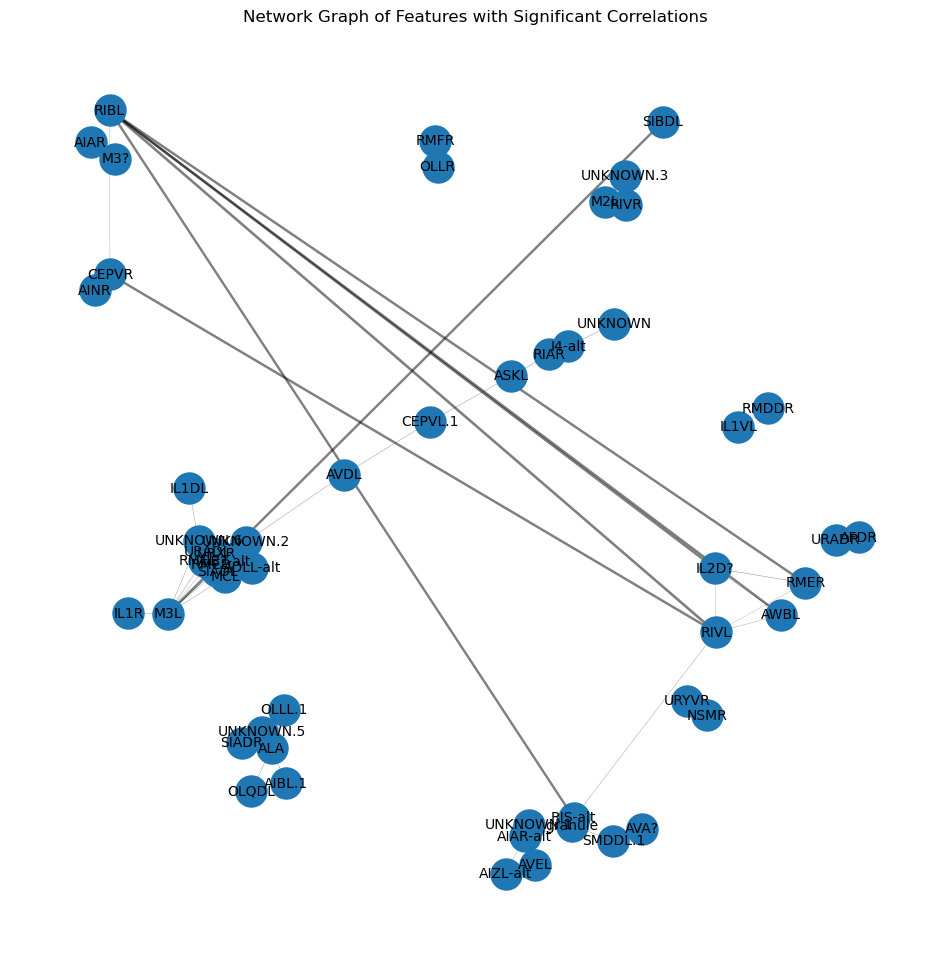

In [8]:
G = nx.Graph()

threshold = 0.7
features = result_matrix.columns

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        spearman_corr = result_matrix.iloc[i, j]
        if abs(spearman_corr) >= threshold:
            G.add_edge(features[i], features[j], weight = spearman_corr)

plt.figure(figsize = (12, 12))
pos = nx.spring_layout(G) 
edges = G.edges(data = True)

edge_weights = [1 - edge[2]['weight'] for edge in edges] 
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_edges(G, pos, width = edge_weights, alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size = 10)

plt.title('Network Graph of Features with Significant Correlations')
plt.axis('off')  
plt.show()

Dynamic Time Warping (DTW):time series alignment; calculating DTW distance to represent time series similarity. Very time-consuming.

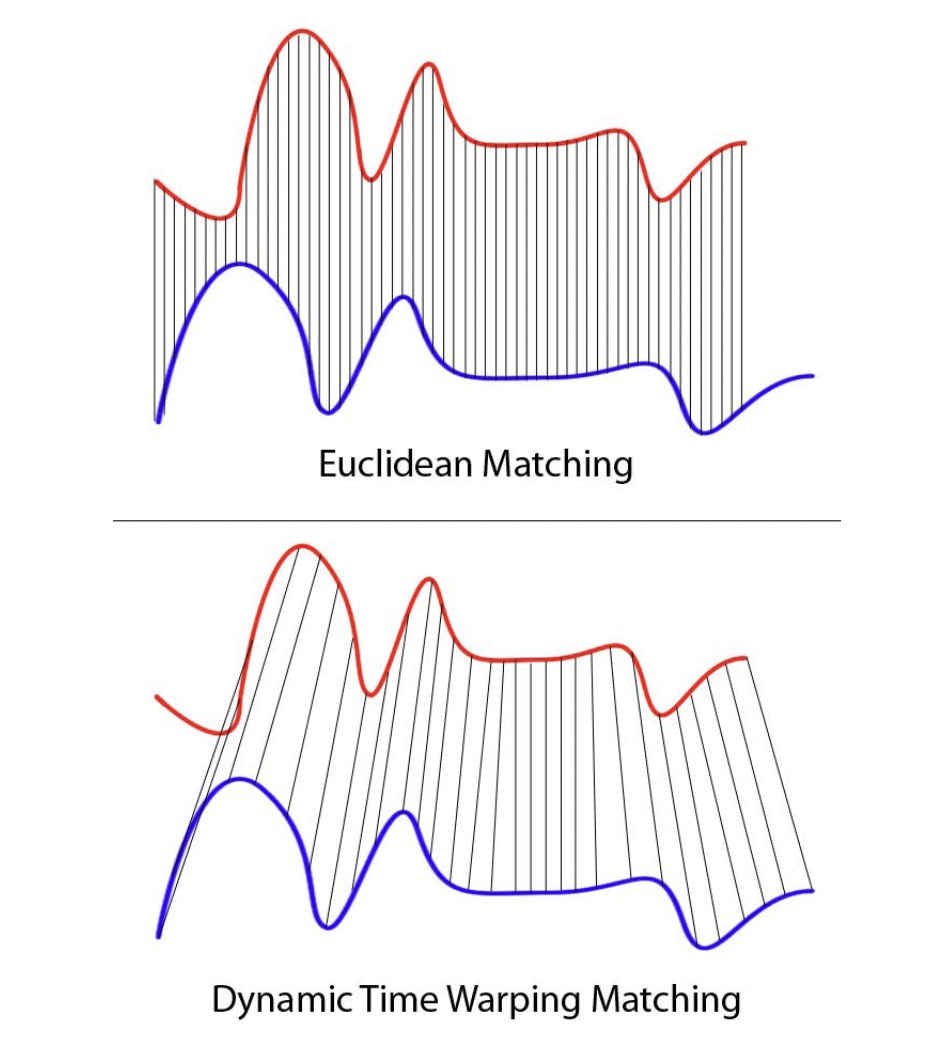

In [9]:
pip install dtw-python pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
from dtw import dtw

num_neurons = df.shape[1] 
dtw_matrix = np.zeros((num_neurons, num_neurons))  

for i in range(num_neurons):
    for j in range(i+1, num_neurons):
        neuron_i = df.iloc[:, i].values
        neuron_j = df.iloc[:, j].values
        
        distance = dtw(neuron_i, neuron_j).distance
        
        dtw_matrix[i, j] = distance
        dtw_matrix[j, i] = distance

dtw_df = pd.DataFrame(dtw_matrix, index = df.columns, columns = df.columns)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [11]:
dtw_df

,AWCL,BAGR,AUAL,BAGL,AIB?,RMEL,MI,RMED,RID,URAVL,...,NSMR,AWAL-alt.1,URADR,OLQDR,IL1R,SMDDR,OLQDL.2,UNKNOWN.6,UNKNOWN.7,IL1L
AWCL,0.000000,917.447257,1066.656348,625.720419,927.760566,807.897384,940.144819,573.536543,873.808496,616.239529,...,830.050941,833.156057,950.439193,829.932859,763.748239,1236.672480,889.144463,733.913898,907.560276,856.243183
BAGR,917.447257,0.000000,827.763433,818.430049,818.813499,749.779600,825.269803,851.103393,870.603478,904.547431,...,859.846299,915.075872,790.972916,760.238174,811.316666,1034.783069,822.908203,816.669131,827.679520,991.721857
AUAL,1066.656348,827.763433,0.000000,733.858278,736.870978,799.237351,686.224585,896.194037,832.786235,860.050671,...,818.567639,850.186820,712.729078,738.168702,761.255020,986.664452,874.271901,806.336021,781.465657,1080.019207
BAGL,625.720419,818.430049,733.858278,0.000000,707.808803,723.372054,673.304918,565.767413,765.299977,718.228847,...,670.992539,729.894713,660.355952,730.191021,620.421011,1030.812900,816.099757,599.914861,673.825960,1007.549097
AIB?,927.760566,818.813499,736.870978,707.808803,0.000000,717.220119,715.051316,723.613681,816.068758,782.628514,...,704.233948,807.473773,635.288231,729.198671,645.254382,1029.871197,852.677983,691.290051,784.121965,958.487658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMDDR,1236.672480,1034.783069,986.664452,1030.812900,1029.871197,1032.248681,1048.048468,1048.104525,1004.948025,1090.743941,...,1030.620753,1142.868081,1008.236692,1054.886001,1063.511636,0.000000,1006.188352,1077.571826,1042.547250,1193.844227
OLQDL.2,889.144463,822.908203,874.271901,816.099757,852.677983,782.614381,849.040916,857.944306,820.870633,883.447086,...,854.634946,971.052135,862.074614,841.611505,814.546228,1006.188352,0.000000,834.613080,839.235069,1020.407956
UNKNOWN.6,733.913898,816.669131,806.336021,599.914861,691.290051,717.355621,707.632698,502.243426,702.207200,655.689116,...,607.748853,754.721601,675.748033,700.117212,608.407541,1077.571826,834.613080,0.000000,652.498784,920.908968
UNKNOWN.7,907.560276,827.679520,781.465657,673.825960,784.121965,839.232034,666.424815,561.100793,695.208771,616.237841,...,724.986725,815.803332,758.784531,713.759222,828.308818,1042.547250,839.235069,652.498784,0.000000,967.260886
